# Feature Engineering

이 실습에서는 pre-trained netwotk forward 된 feature를 활용한 시각화를 수행합니다. 또, animation 및 변수 조정을 통해 feature의 현 상태를 확인하는 process를 진행합니다.

## Load Dataset & package

다른 Task에 적용할 수 있는지를 확인하기 위해서 food101-mini dataset을 Load

In [1]:
from google.colab import drive
drive.mount('/content/my_google_drive')

Mounted at /content/my_google_drive


In [2]:
data_path = '/content/my_google_drive/MyDrive/feature_food101' # type in your path here!

In [3]:
import numpy as np

from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from matplotlib import animation

## Data Pre processing

TSNE에 적용할 수 있는 feature array 만들기

In [4]:
file_num = 0
feature = []
label = []

for i in range(505):
    file_name = data_path+"/feat_cluster"+str(i)+'.npy'
    a = np.load(file_name)
    for j in range(np.shape(a)[0]):
        feature.append(a[j])
        label.append(i//5)

In [5]:
classes = ('Apple pie', 'Baby back ribs', 'Baklava', 'Beef carpaccio', 'Beef tartare', 'Beet salad', 'Beignets', 'Bibimbap', 'Bread pudding', 'Breakfast burrito', 'Bruschetta', 'Caesar salad', 'Cannoli', 'Caprese salad', 'Carrot cake', 'Ceviche', 'Cheesecake', 'Cheese plate', 'Chicken curry', 'Chicken quesadilla', 'Chicken wings', 'Chocolate cake', 'Chocolate mousse', 'Churros', 'Clam chowder', 'Club sandwich', 'Crab cakes', 'Creme brulee', 'Croque madame', 'Cup cakes', 'Deviled eggs', 'Donuts', 'Dumplings', 'Edamame', 'Eggs benedict', 'Escargots', 'Falafel', 'Filet mignon', 'Fish and chips', 'Foie gras', 'French fries', 'French onion soup', 'French toast', 'Fried calamari', 'Fried rice', 'Frozen yogurt', 'Garlic bread', 'Gnocchi', 'Greek salad', 'Grilled cheese sandwich', 'Grilled salmon', 'Guacamole', 'Gyoza', 'Hamburger', 'Hot and sour soup', 'Hot dog', 'Huevos rancheros', 'Hummus', 'Ice cream', 'Lasagna', 'Lobster bisque', 'Lobster roll sandwich', 'Macaroni and cheese', 'Macarons', 'Miso soup', 'Mussels', 'Nachos', 'Omelette', 'Onion rings', 'Oysters', 'Pad thai', 'Paella', 'Pancakes', 'Panna cotta', 'Peking duck', 'Pho', 'Pizza', 'Pork chop', 'Poutine', 'Prime rib', 'Pulled pork sandwich', 'Ramen', 'Ravioli', 'Red velvet cake', 'Risotto', 'Samosa', 'Sashimi', 'Scallops', 'Seaweed salad', 'Shrimp and grits', 'Spaghetti bolognese', 'Spaghetti carbonara', 'Spring rolls', 'Steak', 'Strawberry shortcake', 'Sushi', 'Tacos', 'Takoyaki', 'Tiramisu', 'Tuna tartare', 'Waffles')

## t-SNE Visualization

In [93]:
data_path_cluster = '/content/my_google_drive/MyDrive/predefined_features/'

x = np.load(data_path_cluster+'x_save.npy')
y = np.load(data_path_cluster+'y_save.npy')
z = np.load(data_path_cluster+'z_save.npy')
actual = np.array(label)

In [6]:
# # TSNE 3D
# tsne = TSNE(n_components=3, random_state=0)
# cluster = np.array(tsne.fit_transform(np.array(feature)))
# x, y, z = zip(*cluster)
# actual = np.array(label)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


## 2D tsne

<Figure size 432x288 with 0 Axes>

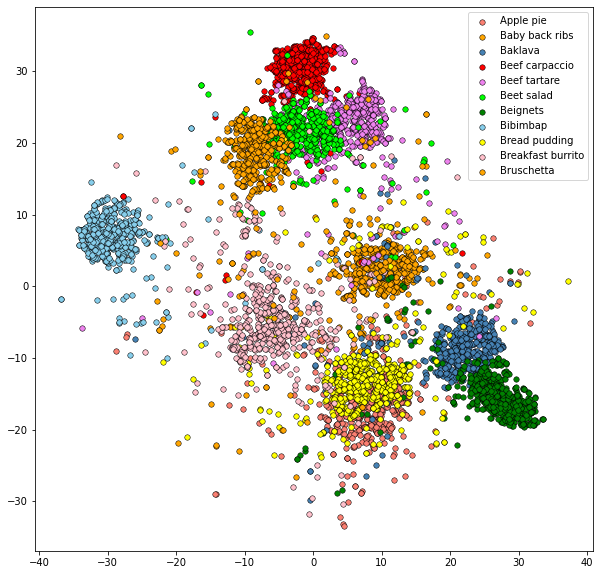

In [94]:
plt.clf()
fig, ax = plt.subplots(1,1,figsize=(10,10))
colors = ['salmon', 'orange', 'steelblue', 'red', 'violet', 'lime', 'green', 'skyblue', 'yellow', 'pink', 'orange']
markers = ['o' for i in range(11)]
sizes = [30 for i in range(11)]
widths = [0.5 for i in range(11)]
	
#### 3. scatter plot 그리기
for i, labels in zip(range(11), classes[0:11]):
    j = np.where(actual == i)[0]
    X = np.array(x)[j]
    Y = np.array(y)[j]
    ax.scatter(X, Y, marker=markers[i], color=colors[i], label=labels, s=sizes[i], edgecolor='k', linewidth=widths[i])

ax.legend(loc='best')

<Figure size 432x288 with 0 Axes>

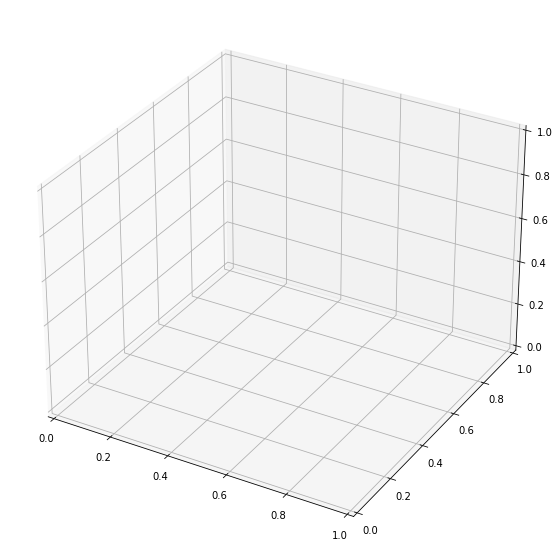

In [95]:
plt.clf()
fig, ax = plt.subplots(ncols=1, figsize=(10, 10), subplot_kw={"projection":"3d"})

## 3D tsne

<Figure size 432x288 with 0 Axes>

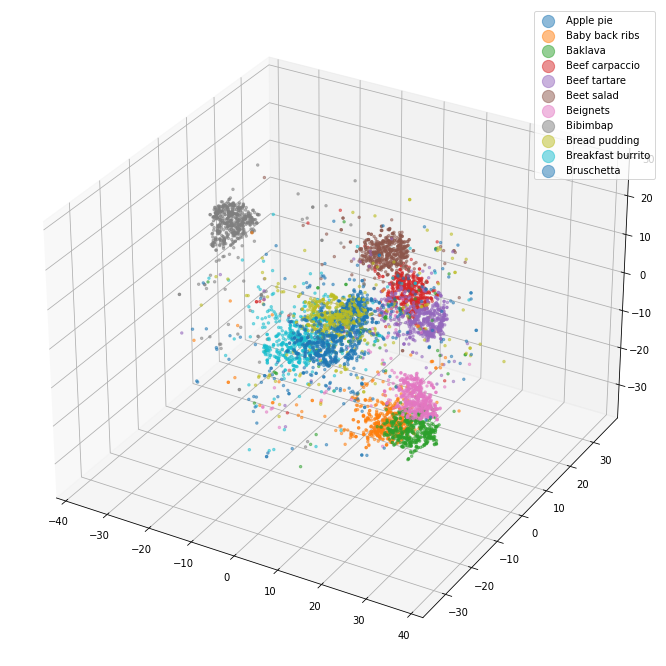

In [121]:
plt.clf()
fig, ax = plt.subplots(ncols=1, figsize=(12, 12), subplot_kw={"projection":"3d"})

for i, labels in zip(range(11), classes[0:11]):
    j = np.where(actual == i)[0]
    x_subset = np.array(x)[j]
    y_subset = np.array(y)[j]
    z_subset = np.array(z)[j]
    label_subset = np.array(label)[j]
    ax.scatter(x_subset, y_subset, z_subset, s=6, marker='o', cmap="Set2_r", alpha=0.5, label=labels)
# ax.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, 1.1), fontsize=8, markerscale=5)
ax.legend(loc='best', markerscale=5)

plt.show()

## Animation

In [79]:
def init101():
    for i, labels in enumerate(classes):
        j = np.where(actual == i)[0]
        x_subset = np.array(x)[j]
        y_subset = np.array(y)[j]
        z_subset = np.array(z)[j]
        label_subset = np.array(label)[j]
        ax.scatter(x_subset, y_subset, z_subset, s=3, marker='.', cmap="viridis", alpha=0.5, label=labels)
    
    ax.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, 1.1), fontsize=8, markerscale=5)
    return fig,

In [100]:
def init():
    for i, labels in zip(range(11), classes[0:11]):
        j = np.where(actual == i)[0]
        x_subset = np.array(x)[j]
        y_subset = np.array(y)[j]
        z_subset = np.array(z)[j]
        label_subset = np.array(label)[j]
        ax.scatter(x_subset, y_subset, z_subset, s=3, marker='.', cmap="Set2_r", alpha=0.5, label=labels)
    #ax.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, 1.1), fontsize=8, markerscale=5)
    return fig,

In [101]:
def animate(i):
    ax.view_init(elev=30., azim=i)
    return fig,

In [102]:
# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=360, interval=20, blit=True)


In [103]:
anim.save('result.gif', fps=10)